# Figure 4B

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
def plot_create():
    plt.title('Model prediction of spinal cord outgrowth: partial synchronization of G1 and S', y=1.05, size=30)
    exp_time = [0, 2, 3, 4, 6, 8]
    exp_outgrowth = [0, 60, 160, 450, 1280, 2260]
    exp_outgrowth_err = [0, 10, 20, 40, 60, 70]
    
    # Experimental outgrowth
    ax.errorbar(exp_time , exp_outgrowth, yerr=exp_outgrowth_err, color='black',ecolor='black', fmt='o',markersize=11,elinewidth=3, label='Experiments')
    
    ax.legend(loc='upper left', facecolor='white')
    plt.xlabel('Time (days)')
    plt.ylabel('Outgrowth' + ' (' + r'$\mu$'+'m)')
    plt.xlim(-0.2,8.2)
    plt.ylim(-50,2500)
    fig.set_size_inches(18.5, 12.5)
    plt.rcParams.update({'font.size': 32})
    filename = "../../Plots/" + "Fig_4B.png"    
    fig.savefig(filename, dpi=300)

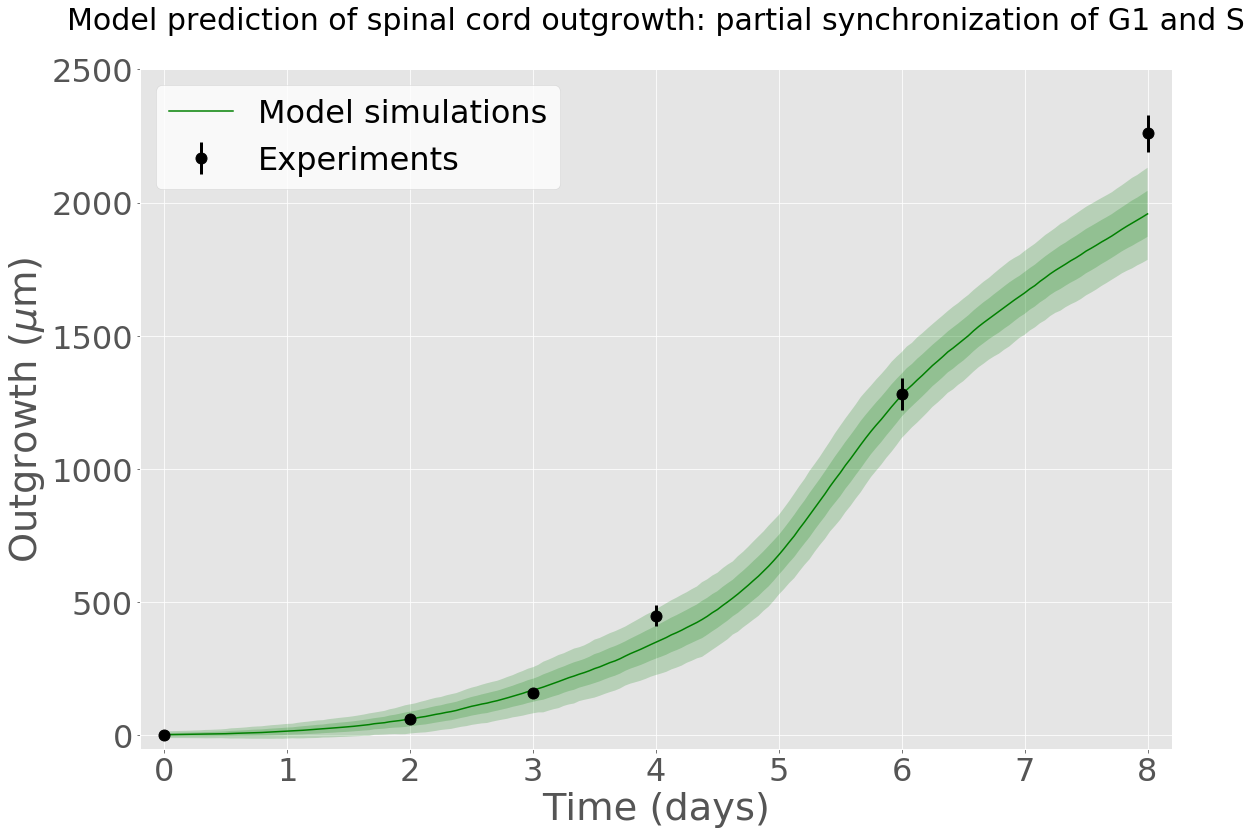

In [4]:
n0 = 205
rl = -1045
tv = 31

root = '../../Simulations/Models/Skip-Skip/'
parameters_set = "n0="+str(n0)+"_rl="+str(rl)+"_tv="+str(tv)

df_all = []
files = os.listdir(root+parameters_set+'/Outgrowth')
ordered_files = sorted(files)
for seed in ordered_files:    
    opened_file = open(root+parameters_set+'/Outgrowth/'+seed)
    df0 = pd.read_csv(opened_file, delimiter=',')
    outgrowth = df0['outgrowth']*13.2
    df_all.append(outgrowth)
df_all = pd.concat(df_all, ignore_index=True, axis=1)
df_mean = np.asarray(df_all.mean(axis=1))
df_std = np.asarray(df_all.std(axis=1))
time = df0['time']/24

# Model simulations
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, df_mean, color='g', label='Model simulations')
ax.fill_between(time, df_mean-df_std, df_mean+df_std, facecolor='g', alpha=0.2)
ax.fill_between(time, df_mean-2*df_std, df_mean+2*df_std, where=(df_mean-2*df_std)<(df_mean-df_std), facecolor='g', alpha=0.2)
#ax.fill_between(time, df_mean-3*df_std, df_mean+3*df_std, facecolor='g', alpha=0.2)

plot_create()